In [110]:
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from data_loading import (load_m1h_activation_data,
                          load_y2h_isoform_data,
                          load_y1h_pdi_data,
                          load_annotated_gencode_tfs,
                          load_DNA_binding_domains)

pd.set_option('display.max_columns', 100)

In [6]:
df = pd.read_excel('/Users/lukelambourne/Desktop/All-BRCA-comparisons3.xlsx',
                   skiprows=1)

In [42]:
df.loc[df['UID'].str.contains('ATF2'), :].sort_values('UID')

,UID,Lowest Rank,Lowest Aggregate Rank,Significant in Any Comparison,Significant in Any Supervised Comparison,Supervised Aggregate Rank,Supervised Aggregate Score,De Novo Aggregate Rank,De Novo Aggregate Score,Survival Aggregate Rank,Survival Aggregate Score,BC-Illumina Max Ratio,BC-Illumina Aggregate Score,Unsupervised-ICGS2-TPM-rho-0.2 Rank,Unsupervised-ICGS2-TPM-broad Rank,Unsupervised-ICGS2-ratio-based Rank,PAM50 vs. Controls Rank,TCGA BC vs. Controls Rank,Survival Ratio-rank,Survival Ratio(sex corrected)-rank,Survival TPM-rank,ANOVA-rawp,ANOVA-adjp,largest fold,ANOVA-rawp.1,ANOVA-adjp.1,largest fold.1,ANOVA-adjp.2,largest fold.2,avg-controls,avg-Basal-like,avg-HER2-enriched,avg-Luminal A,avg-Luminal B,avg-Normal-like,log_fold-Basal-like_vs_controls,log_fold-HER2-enriched_vs_controls,log_fold-Luminal A_vs_controls,log_fold-Luminal B_vs_controls,log_fold-Normal-like_vs_controls,adjp-Basal-like_vs_controls,adjp-HER2-enriched_vs_controls,adjp-Luminal A_vs_controls,adjp-Luminal B_vs_controls,adjp-Normal-like_vs_controls,lowest-adjp vs. Control,largest fold.3,ANOVA-adjp.3,largest fold.4,ANOVA-rawp.2,ANOVA-adjp.4,largest fold.5,HME,HCC,MCF7,ZC,MDA,avg-BC,log_fold-BC_vs_controls,fold-BC_vs_controls,rawp-BC_vs_controls,adjp-BC_vs_controls,avg-controls.1,LRT,Wald,SlrT,Zscore,LRT -log 10 p,LRT.1,Wald.1,SlrT.1,Zscore.1,BH_LRT,FDR_LRT,-log10 FDR_LRT,LRT.2,Wald.2,SlrT.2,Zscore.2,BH_LRT.1,Survival Ratio significant,Survival Ratio(sex corrected)-significant,Survival TPM-significant,HCC.1,MCF7.1,ZC.1,MDA.1
719,ATF2-202|ATF2-206,197,410.500000,0,0,1917.5,0.0,410.5,0.0,2973.333333,0,0.06,0,384,439,197,2590,1245,2744,2030,4146,8.370000e-131,9.090000e-130,0.078701,1.540000e-127,1.460000e-126,0.073905,0.345576,0.011108,0.081681,0.083608,0.081034,0.075435,0.081120,0.072500,0.001928,-0.000646,-0.006246,-0.000561,-0.009181,0.856716,1.000000,1.165900e-01,1.000000,0.792870,1.165900e-01,0.009181,0.395955,0.011108,1.700000e-174,3.430000e-173,0.065029,0.11,0.13,0.15,0.12,0.17,0.072292,-0.009389,-1.006529,3.248130e-03,9.600898e-03,0.081681,0.721740,0.727607,0.727448,0.348311,0.141619,0.232215,0.232922,0.232929,-1.192866,0.546652,0.546652,0.262289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.04,0.01,0.06
578,ATF2-203|ATF2-201,203,331.500000,3,0,2127.0,0.0,331.5,2.0,2847.333333,0,0.08,0,330,335,203,1150,3104,3640,999,3903,1.620000e-140,2.050000e-139,0.150644,1.630000e-144,2.030000e-143,0.147286,0.000007,0.085700,0.135126,0.131031,0.139828,0.150000,0.163200,0.077500,-0.004095,0.004702,0.014874,0.028074,-0.057626,0.778742,0.814735,5.204778e-02,0.000358,0.020496,3.581360e-04,0.057626,0.000081,0.085700,8.410000e-173,1.650000e-171,0.125426,0.16,0.09,0.22,0.17,0.08,0.132020,-0.003106,-1.002155,5.985328e-01,7.096007e-01,0.135126,0.999717,0.999717,0.999717,-0.000355,0.000123,0.051942,0.044815,0.044856,2.006385,0.248470,0.248470,0.604726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,0.06,0.01,0.08
35,ATF2-204,9,21.500000,5,2,1111.5,2.0,21.5,2.0,2619.333333,0,0.10,0,30,15,9,1587,636,1410,3249,3199,2.690000e-256,3.740000e-254,0.574167,8.980000e-281,2.340000e-278,0.581363,0.002982,0.143214,0.434286,0.492474,0.474655,0.477913,0.450400,0.577500,0.058189,0.040369,0.043627,0.016114,0.143214,0.005066,0.135183,8.029405e-03,0.528305,0.020165,5.066254e-03,0.143214,0.088772,0.127100,0.000000e+00,0.000000e+00,0.386143,0.21,0.26,0.27,0.31,0.31,0.500806,0.066520,1.047188,1.180000e-05,6.850000e-05,0.434286,0.352532,0.346329,0.346167,0.941734,0.452802,0.557049,0.557049,0.557044,0.587230,0.819715,0.819715,0.086337,0.854622,0.854415,0.854414,-0.183489,0.980680,NaN,NaN,NaN,0.05,0.06,0.10,0.10
1449,ATF2-205,581,871.000000,0,0,871.0,0.0,1105.0,0.0,1111.000000,0,0.06,0,1258,954,635,1161,581,1022,1612,699,1.470000e-57,4.880000e-57,0.080417,5.070000e-76,2.210000e-75,0.083358,0.001243,0.021258,0.094706,0.080000,0.073448,0.078609,0.080960,0.080000,-0.014706,-0.021258,-0.016097,-0.013746,-0.014706,0.006011,0.001345,3.721511e-04,0.007064,0.646684,3.721511e-04,0.021258,0.878573,0.007512,6.430000e-82,4.16000

In [90]:
# split by increased / decreased fraction
# note that log fold is missnamed and is actually the absolute change in fraction
brca_isos_down = set(df.loc[(df['adjp-BC_vs_controls'] < 0.05) &
                            (df['log_fold-BC_vs_controls'] <= -0.03) &
                            df['UID'].str.contains('/'), 'UID'].values)
brca_isos_up = set(df.loc[(df['adjp-BC_vs_controls'] < 0.05) &
                            (df['log_fold-BC_vs_controls'] >= 0.03) &
                            df['UID'].str.contains('/'), 'UID'].values)
brca_isos_down = {x.split('_')[0] for x in brca_isos_down} 
brca_isos_up = {x.split('_')[0] for x in brca_isos_up} 
(len(brca_isos_down), len(brca_isos_up))

(87, 44)

In [13]:
brca_isos = set(df.loc[(df['Significant in Any Supervised Comparison'] >= 1)
                    & df['UID'].str.contains('/'), 'UID'].values)
brca_isos = {x.split('_')[0] for x in brca_isos}              

In [15]:
len(brca_isos)

318

In [17]:
m1h = load_m1h_activation_data()

In [18]:
m1h.head()

,gene,clone_acc,M1H_rep1,M1H_rep2,M1H_rep3
360,AEBP2,AEBP2|2/3|05F03,0.241019,0.189211,0.473661
359,AEBP2,AEBP2|3/3|05E07,-0.276303,-0.305477,-0.121186
0,ARNT2,ARNT2|1/6|08C12,4.498733,4.501519,4.297244
1,ARNT2,ARNT2|2/6|09E01,2.407721,2.407411,2.197963
3,ARNTL2,ARNTL2|2/5|12C06,0.398027,0.391809,0.299461


In [23]:
m1h['mean'] = m1h[['M1H_rep1', 'M1H_rep2', 'M1H_rep3']].mean(axis=1)

In [26]:
m1h['is_brca_iso'] = m1h['clone_acc'].isin(brca_isos)

In [91]:
m1h['tgca_brca_iso'] = 'no'
m1h.loc[m1h['clone_acc'].isin(brca_isos_down), 'tgca_brca_iso'] = 'down'
m1h.loc[m1h['clone_acc'].isin(brca_isos_up), 'tgca_brca_iso'] = 'up'
m1h['tgca_brca_iso'].value_counts()

no      548
down     49
up       25
Name: tgca_brca_iso, dtype: int64

In [27]:
m1h['is_brca_iso'].sum()

173

MannwhitneyuResult(statistic=35154.0, pvalue=0.03328918878745895)


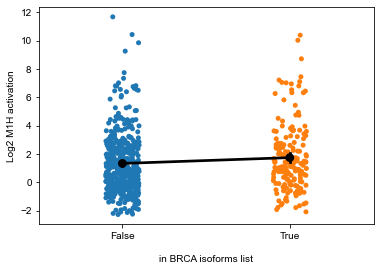

In [132]:
ax = sns.pointplot(data=m1h, x='is_brca_iso', y='mean',
                   color='black')
plt.setp(ax.lines, zorder=100)
plt.setp(ax.collections, zorder=100)
print(stats.mannwhitneyu(m1h.loc[m1h['is_brca_iso'], 'mean'].values,
                         m1h.loc[~m1h['is_brca_iso'], 'mean'].values))
sns.stripplot(data=m1h, x='is_brca_iso', y='mean', ax=ax)
ax.set_xlabel('\nin BRCA isoforms list')
ax.set_ylabel('Log2 M1H activation')
plt.savefig('../figures/M1H-by-BRCA-combined-isoform-list_dotplot.pdf',
            bbox_inches='tight')

MannwhitneyuResult(statistic=10083.0, pvalue=0.0019292575245389522)
MannwhitneyuResult(statistic=5479.0, pvalue=0.0452290414162979)


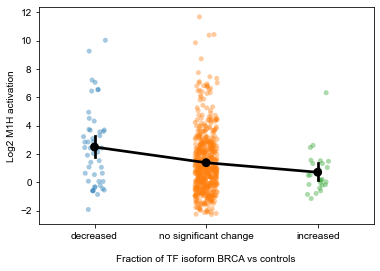

In [98]:
ax = sns.pointplot(data=m1h, x='tgca_brca_iso', y='mean', order=['down', 'no', 'up'],
                   color='black')
plt.setp(ax.lines, zorder=100)
plt.setp(ax.collections, zorder=100)
print(stats.mannwhitneyu(m1h.loc[m1h['tgca_brca_iso'] == 'no', 'mean'].values,
                         m1h.loc[m1h['tgca_brca_iso'] == 'down', 'mean'].values))
print(stats.mannwhitneyu(m1h.loc[m1h['tgca_brca_iso'] == 'no', 'mean'].values,
                         m1h.loc[m1h['tgca_brca_iso'] == 'up', 'mean'].values))
sns.stripplot(data=m1h, x='tgca_brca_iso', y='mean', order=['down', 'no', 'up'],
              alpha=0.4, ax=ax)
ax.set_xlabel('\nFraction of TF isoform BRCA vs controls')
ax.set_xticklabels(['decreased', 'no significant change', 'increased'])
ax.set_ylabel('Log2 M1H activation')
plt.savefig('../figures/M1H-by-TGCA-BRCA-up-and-down_dotplot.pdf',
            bbox_inches='tight')

In [33]:
y1h = load_y1h_pdi_data()

In [99]:
y1h['n_pdi'] = y1h[y1h.columns[2:]].sum(axis=1)

In [102]:
y1h.head()

,tf,unique_acc,HS1022,HS1043,HS1067,HS1139,HS1142,HS118,HS1181,HS1185,HS1199,HS1208,HS1242,HS1271,HS129,HS1315,HS1329,HS1339,HS135,HS1419,HS1436,HS1480,HS149,HS151,HS1516,HS1551,HS1597,HS162,HS1657,HS169,HS170,HS1707,HS174,HS181,HS1811,HS1833,HS1867,HS189,HS194,HS20,HS204,HS2048,HS205,HS2062,HS2081,HS213,HS215,HS218,HS238,HS240,...,HS836,HS863,HS864,HS865,HS878,HS930,HS932,HS935,HS974,HS978,HS990,MUT_112,MUT_115,MUT_116,MUT_118,MUT_119,MUT_120,MUT_129,MUT_137,MUT_142,MUT_143,MUT_144,MUT_15,MUT_156,MUT_158,MUT_162,MUT_163,MUT_166,MUT_17,MUT_187,MUT_19,MUT_193,MUT_20,MUT_207,MUT_214,MUT_218,MUT_219,MUT_260,MUT_281,MUT_30,MUT_32,MUT_36,MUT_37,MUT_40,MUT_41,MUT_46,MUT_64,MUT_75,n_pdi,tgca_brca_iso
162,CREB1,CREB1|1/2|02E01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,no
0,CREB1,CREB1|2/2|01F12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,no
1,DLX1,DLX1|1/2|07A12,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,9,no
174,DLX1,DLX1|2/2|07E09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,no
2,DLX4,DLX4|1/3|11A04,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,no


In [103]:
y1h['tgca_brca_iso'] = 'no'
y1h.loc[y1h['unique_acc'].isin(brca_isos_down), 'tgca_brca_iso'] = 'down'
y1h.loc[y1h['unique_acc'].isin(brca_isos_up), 'tgca_brca_iso'] = 'up'
y1h['tgca_brca_iso'].value_counts()

no      171
down     12
up        6
Name: tgca_brca_iso, dtype: int64

In [104]:
print(stats.mannwhitneyu(y1h.loc[y1h['tgca_brca_iso'] == 'no', 'n_pdi'].values,
                         y1h.loc[y1h['tgca_brca_iso'] == 'down', 'n_pdi'].values))
print(stats.mannwhitneyu(y1h.loc[y1h['tgca_brca_iso'] == 'no', 'n_pdi'].values,
                         y1h.loc[y1h['tgca_brca_iso'] == 'up', 'n_pdi'].values))

MannwhitneyuResult(statistic=918.0, pvalue=0.2695793377578727)
MannwhitneyuResult(statistic=440.0, pvalue=0.2755710722671323)


In [106]:
# isoforms with and without DBD affected
tfs = load_annotated_gencode_tfs()

100%|██████████| 2748/2748 [01:21<00:00, 33.90it/s]


In [108]:
brca_isos_down = set(df.loc[(df['adjp-BC_vs_controls'] < 0.05) &
                            (df['log_fold-BC_vs_controls'] <= -0.03) &
                            ~df['UID'].str.contains('/'), 'UID'].values)
brca_isos_up = set(df.loc[(df['adjp-BC_vs_controls'] < 0.05) &
                            (df['log_fold-BC_vs_controls'] >= 0.03) &
                            ~df['UID'].str.contains('/'), 'UID'].values)
brca_isos_down = {y for x in brca_isos_down for y in x.split('|')} 
brca_isos_up = {y for x in brca_isos_up for y in x.split('|')}  
(len(brca_isos_down), len(brca_isos_up))

(494, 538)

In [113]:
def get_longest_isoform(gene):
    return list(sorted(gene.orfs, key=lambda x: len(x.aa_seq), reverse=True))[0].name

df = pd.concat([g.aa_feature_disruption(get_longest_isoform(g)) for g in tfs.values()])
dbd = load_DNA_binding_domains()
dbd['num_genes'] = dbd['pfam'].map(df.groupby('accession')['gene'].size())
df['is_DBD'] = df['accession'].isin(dbd['pfam'].values) | df['accession'].str.startswith('C2H2_ZF_array')
df['is_affected'] = (df['deletion'] + df['insertion'] + df['frameshift']) > 0

In [119]:
df = pd.concat([df.loc[df['is_DBD'], :].groupby('alt_iso')['is_affected'].any(),
           pd.Series(index=df['ref_iso'].unique(), data=False)]).to_frame(name='DBD_affected')

In [122]:
df['tgca_brca_iso'] = 'no'
df.loc[df.index.isin(brca_isos_down), 'tgca_brca_iso'] = 'down'
df.loc[df.index.isin(brca_isos_up), 'tgca_brca_iso'] = 'up'

tgca_brca_iso
down    0.271955
no      0.375946
up      0.350133
Name: DBD_affected, dtype: float64

In [130]:
from ccsblib import ccsbplotlib as cplt

fig, ax = plt.subplots(1, 1)
cplt.validation_plot(data=df, 
                     selections=[df['tgca_brca_iso'] == x for x in ['up', 'no', 'down']],
                     result_column='DBD_affected',
                     errorbar_capsize=0.3,
                     y_max=0.5,
                     ax=ax)
ax.set_xlabel('\nFraction of TF isoform BRCA vs controls')
ax.set_xticklabels(['decreased', 'no significant change', 'increased'])
ax.set_ylabel('Fraction of isoforms with DBD affected')
plt.savefig('../figures/DBD-affected-fraction-by-TGCA-BRCA-up-and-down_bar-chart.pdf',
            bbox_inches='tight')